In [54]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy.integrate import solve_bvp
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [84]:
def make_video(t_solution, y_solution, name="2dogs1sheep"):
    ts = t_solution
    xd1, yd1, vxd1, vyd1, xd2, yd2, vxd2, vyd2, xs1, ys1, vxs1, vys1, \
        p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12 = y_solution

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # Set axis limits (adjust based on your data)
    ax.set_xlim(min(np.min(xd1), np.min(xd2), np.min(xs1)) - 1, max(np.max(xd1), np.max(xd2), np.max(xs1)) + 1)
    ax.set_ylim(min(np.min(yd1), np.min(yd2), np.min(ys1)) - 1, max(np.max(yd1), np.max(yd2), np.max(ys1)) + 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Animation of State Evolution')

    # Plot points for each object
    point_d1, = ax.plot([], [], 'go', markersize=8, label='Dog 1')  # Red point
    point_d2, = ax.plot([], [], 'go', markersize=8, label='Dog 2')  # Blue point
    point_s1, = ax.plot([], [], 'ro', markersize=8, label='Sheep')  # Green point

    # Initialize lines to store the trail paths
    trail_d1, = ax.plot([], [], 'g-', alpha=0.5)
    trail_d2, = ax.plot([], [], 'g-', alpha=0.5)
    trail_s1, = ax.plot([], [], 'r-', alpha=0.5)

    # Lists to store the previous positions of each point
    trail_d1_x, trail_d1_y = [], []
    trail_d2_x, trail_d2_y = [], []
    trail_s1_x, trail_s1_y = [], []
    
    # Add a marker at the origin (0, 0) and add gridlines and a legend
    ax.plot(0, 0, 'kX', markersize=5)
    ax.grid(True)
    ax.legend()

    # Update function for animation
    def update(frame):
        point_d1.set_data([xd1[frame]], [yd1[frame]])  # Use list to ensure iterable
        point_d2.set_data([xd2[frame]], [yd2[frame]])
        point_s1.set_data([xs1[frame]], [ys1[frame]])
        
        # Append current positions to the trails
        trail_d1_x.append(xd1[frame])
        trail_d1_y.append(yd1[frame])
        trail_d2_x.append(xd2[frame])
        trail_d2_y.append(yd2[frame])
        trail_s1_x.append(xs1[frame])
        trail_s1_y.append(ys1[frame])
        
        # Update trails by setting the new data
        trail_d1.set_data(trail_d1_x, trail_d1_y)
        trail_d2.set_data(trail_d2_x, trail_d2_y)
        trail_s1.set_data(trail_s1_x, trail_s1_y)
        
        return point_d1, point_d2, point_s1

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(ts), interval=50, blit=True)
    ani.save(name + '.mp4', writer='ffmpeg', fps=30)

    # Show the end of the animation
    print(f"Video saved at {name}.mp4")
    plt.show()

Consider a problem where we have just 2 dogs and one sheep. Let $(x_{d_i},y_{d_i})$ be the position of the ith dog and $(v_{x_{d_i}},v_{y_{d_i}})$ be the velocity vector of the ith dog. Also, let $(u_1,u_2)$ be the acceleration (control) of the first and $(u_3,u_4)$ the acceleration (control) of the second. 

Thus, we have the state evolution equation $\frac{d}{dt}\begin{bmatrix}x_{d_1}\\y_{d_1}\\v_{x_{d_1}}\\v_{y_{d_1}}\\x_{d_2}\\y_{d_2}\\v_{x_{d_2}}\\v_{y_{d_2}}\\x_{s_1}\\y_{s_1}\\v_{x_{s_1}}\\v_{y_{s_1}}\end{bmatrix}=\begin{bmatrix}v_{x_{d_1}}\\v_{y_{d_1}}\\u_1\\u_2\\v_{x_{d_2}}\\v_{y_{d_2}}\\u_3\\u_4\\v_{x_{s_1}}\\v_{y_{s_1}}\\a \\ b
\end{bmatrix}$ where $a=\frac{x_{s_1}-x_{d_1}}{[(x_{s_1}-x_{d_1})^2+(y_{s_1}-y_{d_1})^2]^{\lambda/2}}+\frac{x_{s_1}-x_{d_2}}{[(x_{s_1}-x_{d_2})^2+(y_{s_1}-y_{d_2})^2]^{\lambda/2}}$ and $b=\frac{y_{s_1}-y_{d_1}}{[(x_{s_1}-x_{d_1})^2+(y_{s_1}-y_{d_1})^2]^{\lambda/2}}+\frac{y_{s_1}-y_{d_2}}{[(x_{s_1}-x_{d_2})^2+(y_{s_1}-y_{d_2})^2]^{\lambda/2}}$. 

We originally had the cost functional $J[u]=\int_0^{t_f}[\alpha (x_{s_1}^2+y_{s_1}^2)+u_1^2+u_2^2+u_3^2+u_4^2]dt$. However, upon further testing, the dogs went off far in all directions. So, to keep them close to the center as well, we let $J[u]=\int_0^{t_f}[\alpha (x_{s_1}^2+y_{s_1}^2) +\beta(x_{d_1}^2+y_{d_1}^2+x_{d_2}^2+y_{d_2}^2) +u_1^2+u_2^2+u_3^2+u_4^2]dt$

Putting this altogether, gives the Hamiltonian $H=p\cdot f-L=p_1v_{x_{d_1}}+p_2v_{y_{d_1}}+p_3u_1+p_4u_2+p_5v_{x_{d_2}}+p_6v_{y_{d_2}}+p_7u_3+p_8u_4+p_9v_{x_{s_1}}+p_{10}v_{y_{s_1}}+p_{11}a+p_{12}b-\alpha x_{s_1}^2-\alpha y_{s_1}^2-\beta x_{d_1}^2-\beta y_{d_1}^2- \beta x_{d_2}^2- \beta y_{d_2}^2-u_1^2-u_2^2-u_3^2-u_4^2$

This gives the co-state evolution equation $p'=-\frac{DH}{Dx}=-\begin{bmatrix}p_{11}\frac{da}{dx_{d_1}}+p_{12}\frac{db}{dx_{d_1}}-2\beta x_{d_1}\\ p_{11}\frac{da}{dy_{d_1}}+p_{12}\frac{db}{dy_{d_1}}- 2\beta y_{d_1}\\p_1\\p_2\\p_{11}\frac{da}{dx_{d_2}}+p_{12}\frac{db}{dx_{d_2}} - 2\beta x_{d_2}\\p_{11}\frac{da}{dy_{d_2}}+p_{12}\frac{db}{dy_{d_2}} - 2\beta y_{d_2}\\p_5\\p_6\\p_{11}\frac{da}{dx_{s_1}}+p_{12}\frac{db}{dx_{s_1}}-2\alpha x_{s_1}\\p_{11}\frac{da}{dy_{s_1}}+p_{12}\frac{db}{dy_{s_1}}-2\alpha y_{s_1}\\p_9\\p_{10}\end{bmatrix}$. To keep things clean, we avoid computing the derivatives of $a$ and $b$. It will suffices to use Sympy to compute the derivatives.

In [113]:
# Define variables
xd1, yd1, vxd1, vyd1, \
xd2, yd2, vxd2, vyd2, \
xs1, ys1, vxs1, vys1 = \
sp.symbols('x_d1 y_d1 v_xd1 v_yd1 x_d2 y_d2 v_xd2 v_yd2 x_s1 y_s1 v_xs1 v_ys1')
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12 = sp.symbols('p1 p2 p3 p4 p5 p6 p7 p8 p9 p10 p11 p12')
u1, u2, u3, u4 = sp.symbols('u1 u2 u3 u4')
lambd, alpha, beta = 3, 10, 2
epsilon = 1e-3  # Small constant to prevent division by zero

# Define squared distances
r1_sq = (xs1 - xd1)**2 + (ys1 - yd1)**2 + epsilon
r2_sq = (xs1 - xd2)**2 + (ys1 - yd2)**2 + epsilon

# Define a and b
a_left = (xs1 - xd1) / (r1_sq**(lambd / 2))
a_right = (xs1 - xd2) / (r2_sq**(lambd / 2))
a = a_left + a_right
b_left = (ys1 - yd1) / (r1_sq**(lambd / 2))
b_right = (ys1 - yd2) / (r2_sq**(lambd / 2))
b = b_left + b_right

# Define the Hamiltonian
L = alpha*xs1**2 + alpha*ys1**2 + u1**2 + u2**2 + u3**2 + u4**2
L += beta*xd1**2 + beta*yd1**2 + beta*xd2**2 + beta*yd2**2  # Penalize dogs from being too far from the origin
H = p1*vxd1 + p2*vyd1 + p3*u1 + p4*u2 + p5*vxd2 + p6*vyd2 + p7*u3 + p8*u4 + p9*vxs1 + p10*vys1 + p11*a + p12*b - L
    
# Define state and costate vectors
state_vars = [xd1, yd1, vxd1, vyd1, xd2, yd2, vxd2, vyd2, xs1, ys1, vxs1, vys1]
costate_vars = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12]

# Compute and simplify state and costate equations
dx_dt = [sp.simplify(sp.diff(H, p)) for p in costate_vars]
dp_dt = [sp.simplify(-sp.diff(H, x)) for x in state_vars]

# Compute optimal control
control_eqs = [sp.simplify(sp.diff(H, u)) for u in [u1, u2, u3, u4]]
optimal_controls = sp.solve(control_eqs, [u1, u2, u3, u4])

# Write state and cos-state equation in terms of each other
dx_dt_opt = [expr.subs(optimal_controls) for expr in dx_dt]
dp_dt_opt = [expr.subs(optimal_controls) for expr in dp_dt]

# Create a function for dx/dt and dp/dt
dx_dt_func = lambdify(state_vars + costate_vars, dx_dt_opt, 'numpy')
dp_dt_func = lambdify(state_vars + costate_vars, dp_dt_opt, 'numpy')

In [114]:
def ode(t, y):    
    state = y[:12]
    costate = y[12:]
    
    # Compute derivatives
    dx_dt_values = np.array(dx_dt_func(*state, *costate))
    dp_dt_values = np.array(dp_dt_func(*state, *costate))

    return np.concatenate([dx_dt_values, dp_dt_values])

def bc(y0, yT):
    # Initial conditions on states
    x0 = np.array([1, 1, 2, 3, -1, -1, -3, 4, 0, 2, 0, 0])
    state_initial = y0[:12] - x0  # x(0) = x0
    # Final conditions on costates
    costate_final = yT[12:]       # p(T) = 0
    return np.concatenate([state_initial, costate_final])

# Time discretization
tf = 10.0  # Total time
num_points = 500  # Number of points in the grid
t = np.linspace(0, tf, num_points)

# Initial guess (random or based on heuristics)
y_guess = .5*np.ones((24, num_points))  # 12 state + 12 costate variables

# Solve BVP
solution = solve_bvp(ode, bc, t, y_guess)

# Extract solution
t_solution = solution.x
y_solution = solution.y

Video saved at 2dogs1sheep.mp4


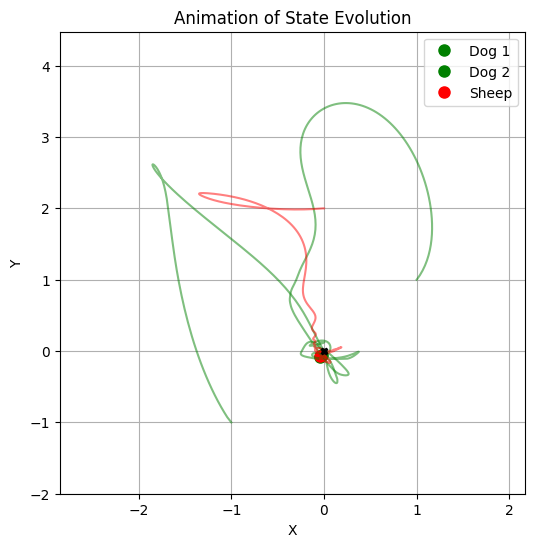

In [115]:
make_video(t_solution, y_solution, name="2dogs1sheep")

In [ ]:
# r = 1
# N0 = 2
# delta = 0.5
# tf = 5

# def chemo3(t,y):
#   N, p = y
#   u = -(delta*N/2)*p
#   N_prime = r*N*np.log(1/N) - delta*u*N
#   p_prime = -r*p*np.log(1/N) + r*p + p*delta*u + 2*N
#   return np.vstack((N_prime, p_prime))

# #Now define a function that treats the boundary conditions.
# def bc(ya,yb):
#   return np.array([ya[0]-N0, yb[1]+0])

# #Now compute the solution.
# t = np.linspace(0, tf, 100)
# y = np.ones((2, t.size)) #specify an 'initial guess' for the -soln y
# res = solve_bvp(chemo3, bc, t, y)

# #Plotting the results (if desired)
# t_plot = np.linspace(0, tf, 100)
# x_plot = res.sol(t_plot)[0]
# p_plot = res.sol(t_plot)[1]
# plt.title("Optimal Chemo Concentration For Cancer Patient")
# plt.plot(t_plot, x_plot) # the state
# plt.plot(t_plot, -(delta*x_plot/2)*p_plot) #the control
# plt.legend(['cancer cells','chemo concentration'])
# plt.show()